In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import numpy as np
from sklearn.metrics import precision_recall_curve
from io import StringIO

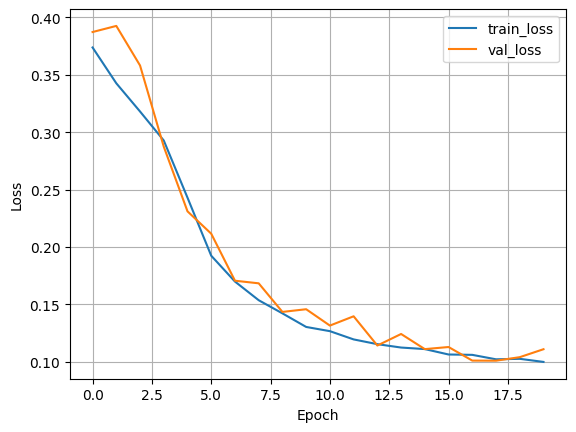

In [ ]:
log = pd.read_csv("../runs/second_run/training_log.csv") 
fig, ax = plt.subplots()
ax.plot(log["epoch"], log["loss"], label="train_loss")
ax.plot(log["epoch"], log["val_loss"], label="val_loss")
ax.set_xlabel("Epoch"); ax.set_ylabel("Loss"); ax.legend(); ax.grid(True)
plt.show()

# fig, ax = plt.subplots()
# ax.plot(log["epoch"], log["acc"], label="train_acc")
# ax.plot(log["epoch"], log["val_acc"], label="val_acc")
# ax.set_xlabel("Epoch"); ax.set_ylabel("Accuracy"); ax.legend(); ax.grid(True)
# plt.show()

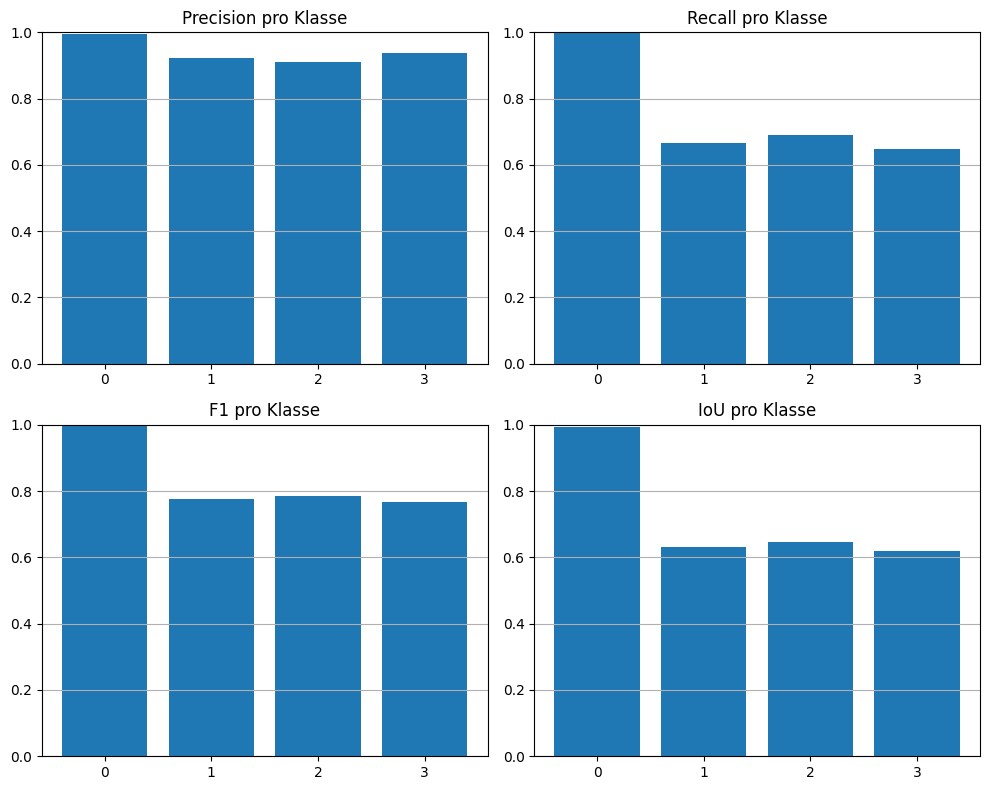

In [11]:
m = json.load(open("../runs/second_run/eval_20251115_002246/metrics.json", "r"))  # Pfad anpassen
labels = [0,1,2,3]
prec = [m["classification_report"][str(k)]["precision"] for k in labels]
rec  = [m["classification_report"][str(k)]["recall"]    for k in labels]
f1   = [m["classification_report"][str(k)]["f1-score"]  for k in labels]
iou  = [m["iou_per_class"][str(k)] for k in labels]

def bar(ax, vals, title):
    ax.bar(range(len(labels)), vals)
    ax.set_xticks(range(len(labels))); ax.set_xticklabels(labels)
    ax.set_title(title); ax.set_ylim(0,1); ax.grid(True, axis="y")

fig, axs = plt.subplots(2,2, figsize=(10,8))
bar(axs[0,0], prec, "Precision pro Klasse"); bar(axs[0,1], rec, "Recall pro Klasse")
bar(axs[1,0], f1,   "F1 pro Klasse");        bar(axs[1,1], iou, "IoU pro Klasse")
plt.tight_layout(); plt.show()

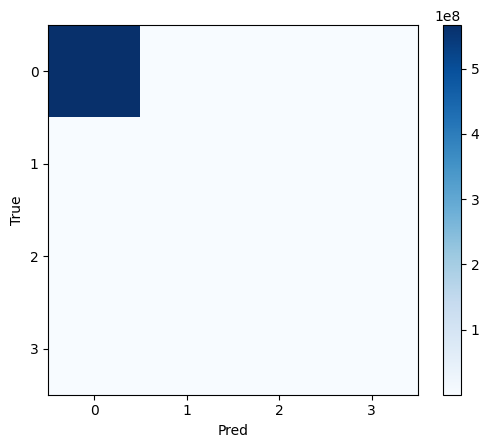

In [6]:
cm = np.array(m["confusion_matrix"])
fig, ax = plt.subplots()
im = ax.imshow(cm, cmap="Blues")
ax.set_xlabel("Pred"); ax.set_ylabel("True")
ax.set_xticks(range(4)); ax.set_yticks(range(4))
fig.colorbar(im, ax=ax); plt.show()

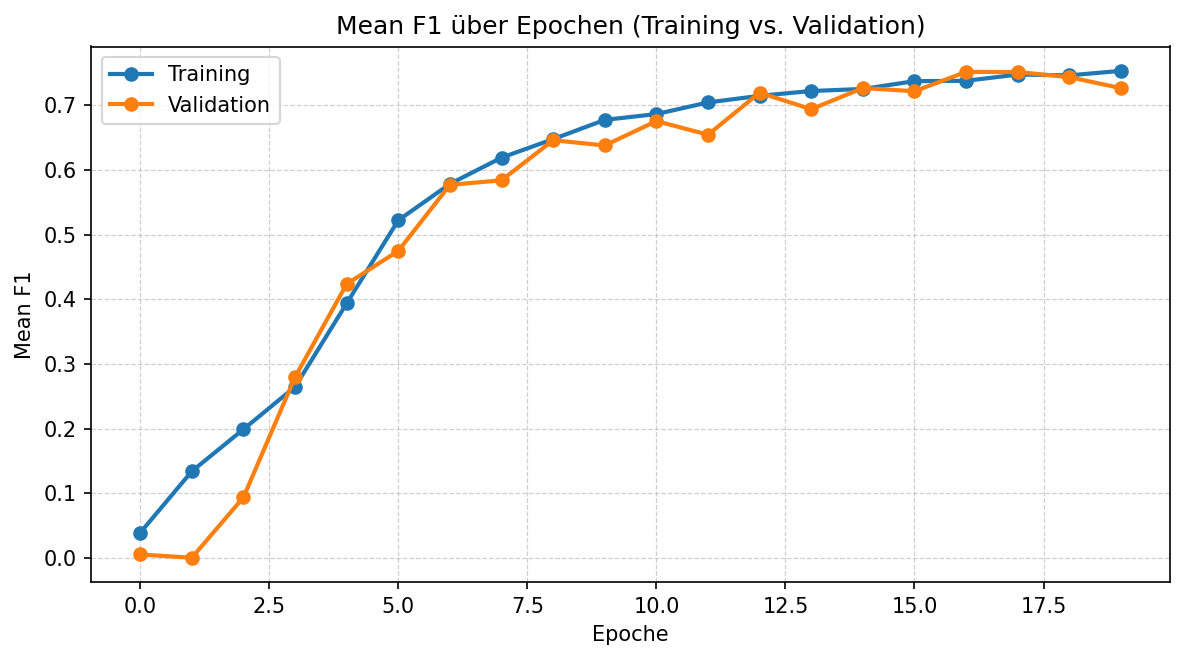

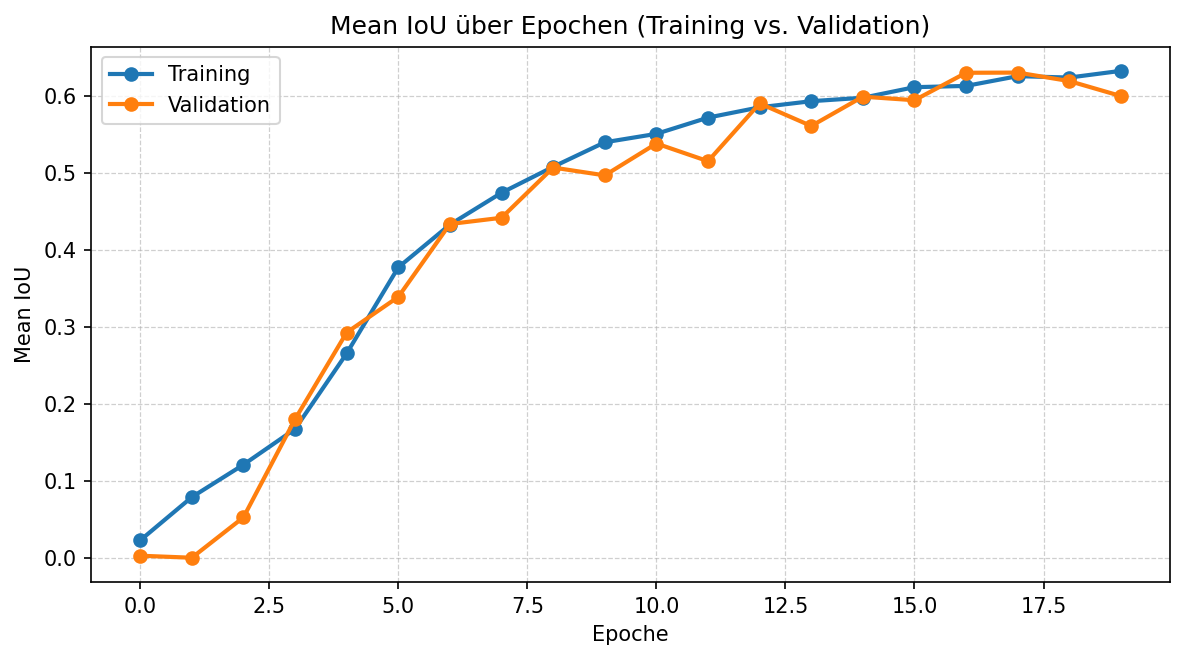

In [2]:
csv_text = """epoch,learning_rate,loss,mean_f1,mean_iou,val_loss,val_mean_f1,val_mean_iou
0,0.0010000000474974513,0.37384817004203796,0.03866243362426758,0.022634772583842278,0.3873382806777954,0.005092224106192589,0.0026596803218126297
1,0.0010000000474974513,0.3426350951194763,0.1338522881269455,0.07883912324905396,0.39265453815460205,4.753661050926894e-05,2.411217246844899e-05
2,0.0010000000474974513,0.3180381953716278,0.1988416612148285,0.12103384733200073,0.3581674098968506,0.0934881716966629,0.052535075694322586
3,0.0010000000474974513,0.29273301362991333,0.26460254192352295,0.16746342182159424,0.28737160563468933,0.2796646058559418,0.18019117414951324
4,0.0010000000474974513,0.24288973212242126,0.3937731981277466,0.26571956276893616,0.23097719252109528,0.4236432611942291,0.29292771220207214
5,0.0010000000474974513,0.19227029383182526,0.5222713351249695,0.37763044238090515,0.21147151291370392,0.4748910665512085,0.339203804731369
6,0.0010000000474974513,0.1697419285774231,0.5785614252090454,0.433218389749527,0.17047864198684692,0.5771526098251343,0.43400365114212036
7,0.0010000000474974513,0.1534782350063324,0.61921626329422,0.4746167063713074,0.16821032762527466,0.5841368436813354,0.4421277940273285
8,0.0010000000474974513,0.14200608432292938,0.6478760242462158,0.5083987712860107,0.14327511191368103,0.6461868286132812,0.507432758808136
9,0.0010000000474974513,0.1301695704460144,0.6776564717292786,0.5402814149856567,0.14561842381954193,0.6380559802055359,0.4972548186779022
10,0.0010000000474974513,0.12649284303188324,0.6866773962974548,0.5512524247169495,0.13136425614356995,0.6758171916007996,0.5386890172958374
11,0.0010000000474974513,0.1192997619509697,0.7046371698379517,0.5723692774772644,0.13946104049682617,0.6546652913093567,0.5156857967376709
12,0.0010000000474974513,0.1151541993021965,0.7149150371551514,0.585772693157196,0.11397191137075424,0.7198606133460999,0.5908081531524658
13,0.0010000000474974513,0.11221121996641159,0.7223371863365173,0.5937289595603943,0.12403327226638794,0.6941304802894592,0.5614792704582214
14,0.0010000000474974513,0.11086516082286835,0.7255082726478577,0.5982049703598022,0.11083312332630157,0.7269649505615234,0.5996019840240479
15,0.0010000000474974513,0.1061478853225708,0.7375913858413696,0.6119444966316223,0.11267130076885223,0.7219574451446533,0.5949787497520447
16,0.0010000000474974513,0.10583359003067017,0.7381465435028076,0.6135889291763306,0.10083434730768204,0.7519288063049316,0.6306965947151184
17,0.0010000000474974513,0.10195041447877884,0.7478270530700684,0.6262930631637573,0.10074672847986221,0.7517650127410889,0.6309148073196411
18,0.0010000000474974513,0.10237790644168854,0.746545135974884,0.6244711875915527,0.10381284356117249,0.7437795400619507,0.6198814511299133
19,0.0010000000474974513,0.09967342019081116,0.7535475492477417,0.6331896781921387,0.11074567586183548,0.7267534732818604,0.6003760099411011
"""

df = pd.read_csv(StringIO(csv_text))

# ==== Plot-Funktionen ====
def plot_metric(df, train_col, val_col, title, ylabel, savepath=None):
    plt.figure(figsize=(8, 4.5), dpi=150)
    plt.plot(df["epoch"], df[train_col], marker="o", linewidth=2, label="Training")
    plt.plot(df["epoch"], df[val_col], marker="o", linewidth=2, label="Validation")

    plt.title(title)
    plt.xlabel("Epoche")
    plt.ylabel(ylabel)

    plt.grid(True, which="both", linestyle="--", linewidth=0.6, alpha=0.6)
    plt.legend(loc="best")
    plt.tight_layout()

    if savepath is not None:
        plt.savefig(savepath, bbox_inches="tight")
    plt.show()

# ==== Mean F1 & Mean IoU plotten ====
plot_metric(
    df,
    train_col="mean_f1",
    val_col="val_mean_f1",
    title="Mean F1 über Epochen (Training vs. Validation)",
    ylabel="Mean F1",
    savepath="mean_f1_train_vs_val.png",
)

plot_metric(
    df,
    train_col="mean_iou",
    val_col="val_mean_iou",
    title="Mean IoU über Epochen (Training vs. Validation)",
    ylabel="Mean IoU",
    savepath="mean_iou_train_vs_val.png",
)


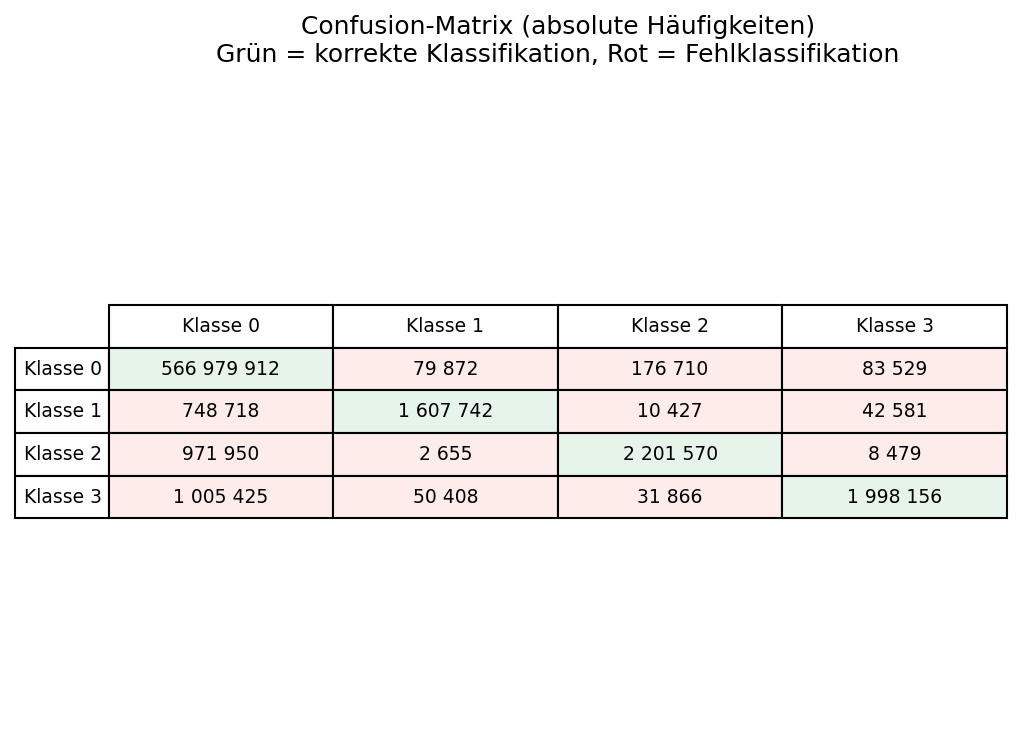

In [4]:
# Confusion Matrix (rows=true, cols=pred)
cm_values = [
    566979912, 79872, 176710, 83529,
    748718, 1607742, 10427, 42581,
    971950, 2655, 2201570, 8479,
    1005425, 50408, 31866, 1998156
]

cm = np.array(cm_values).reshape(4, 4)

labels = ["Klasse 0", "Klasse 1", "Klasse 2", "Klasse 3"]

fig, ax = plt.subplots(figsize=(7, 5), dpi=150)
ax.axis("off")

# Farben
diag_color = "#e6f4ea"   # sehr helles Grün
off_color  = "#fdecea"   # sehr helles Rot

# Tabelle bauen
table_data = []
cell_colors = []

for i in range(4):
    row = []
    row_colors = []
    for j in range(4):
        row.append(f"{cm[i, j]:,}".replace(",", " "))
        if i == j:
            row_colors.append(diag_color)
        else:
            row_colors.append(off_color)
    table_data.append(row)
    cell_colors.append(row_colors)

table = ax.table(
    cellText=table_data,
    cellColours=cell_colors,
    rowLabels=labels,
    colLabels=labels,
    loc="center",
    cellLoc="center"
)

table.scale(1.2, 1.6)
table.auto_set_font_size(False)
table.set_fontsize(9)

# Titel
plt.title(
    "Confusion-Matrix (absolute Häufigkeiten)\n"
    "Grün = korrekte Klassifikation, Rot = Fehlklassifikation",
    pad=20
)

plt.tight_layout()
plt.savefig("confusion_matrix_table_absolute.pdf", bbox_inches="tight")
plt.show()
